# Case HR
#### The case revolves around a fictitious company and the core data set contains: names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, performance score, absences, most recent performance review date, and employee engagement score.

##### Our objective is to find out how the HR policy of the company can improve:
##### 1 - What are our best recruiting sources if we want to ensure a diverse organization?

##### 2 - Is there any relationship between who a person works for and their performance score?

##### 3 - Which are the main reasons our employees are leaving us?
##### Revisar los motivos de dropout de los empleados


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [160]:
df=pd.read_csv('../datasets/HRDataset_clean.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [161]:
df.shape

(311, 36)

In [162]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,15.167203,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.842585,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,16.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.500000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [163]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 


Preview of data with null values:
xxxxxxxxxxxxx
         Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0  Adinolfi, Wilson  K  10026          0                0         1   
3         Alagbe,Trina  10088          1                1         0   
5    Anderson, Linda    10002          0                0         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
3            1       5            3                       0   64991  ...   
5            1       5            4                       0   57568  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
5        Amy Dunn       11.0          LinkedIn          Exceeds   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60             

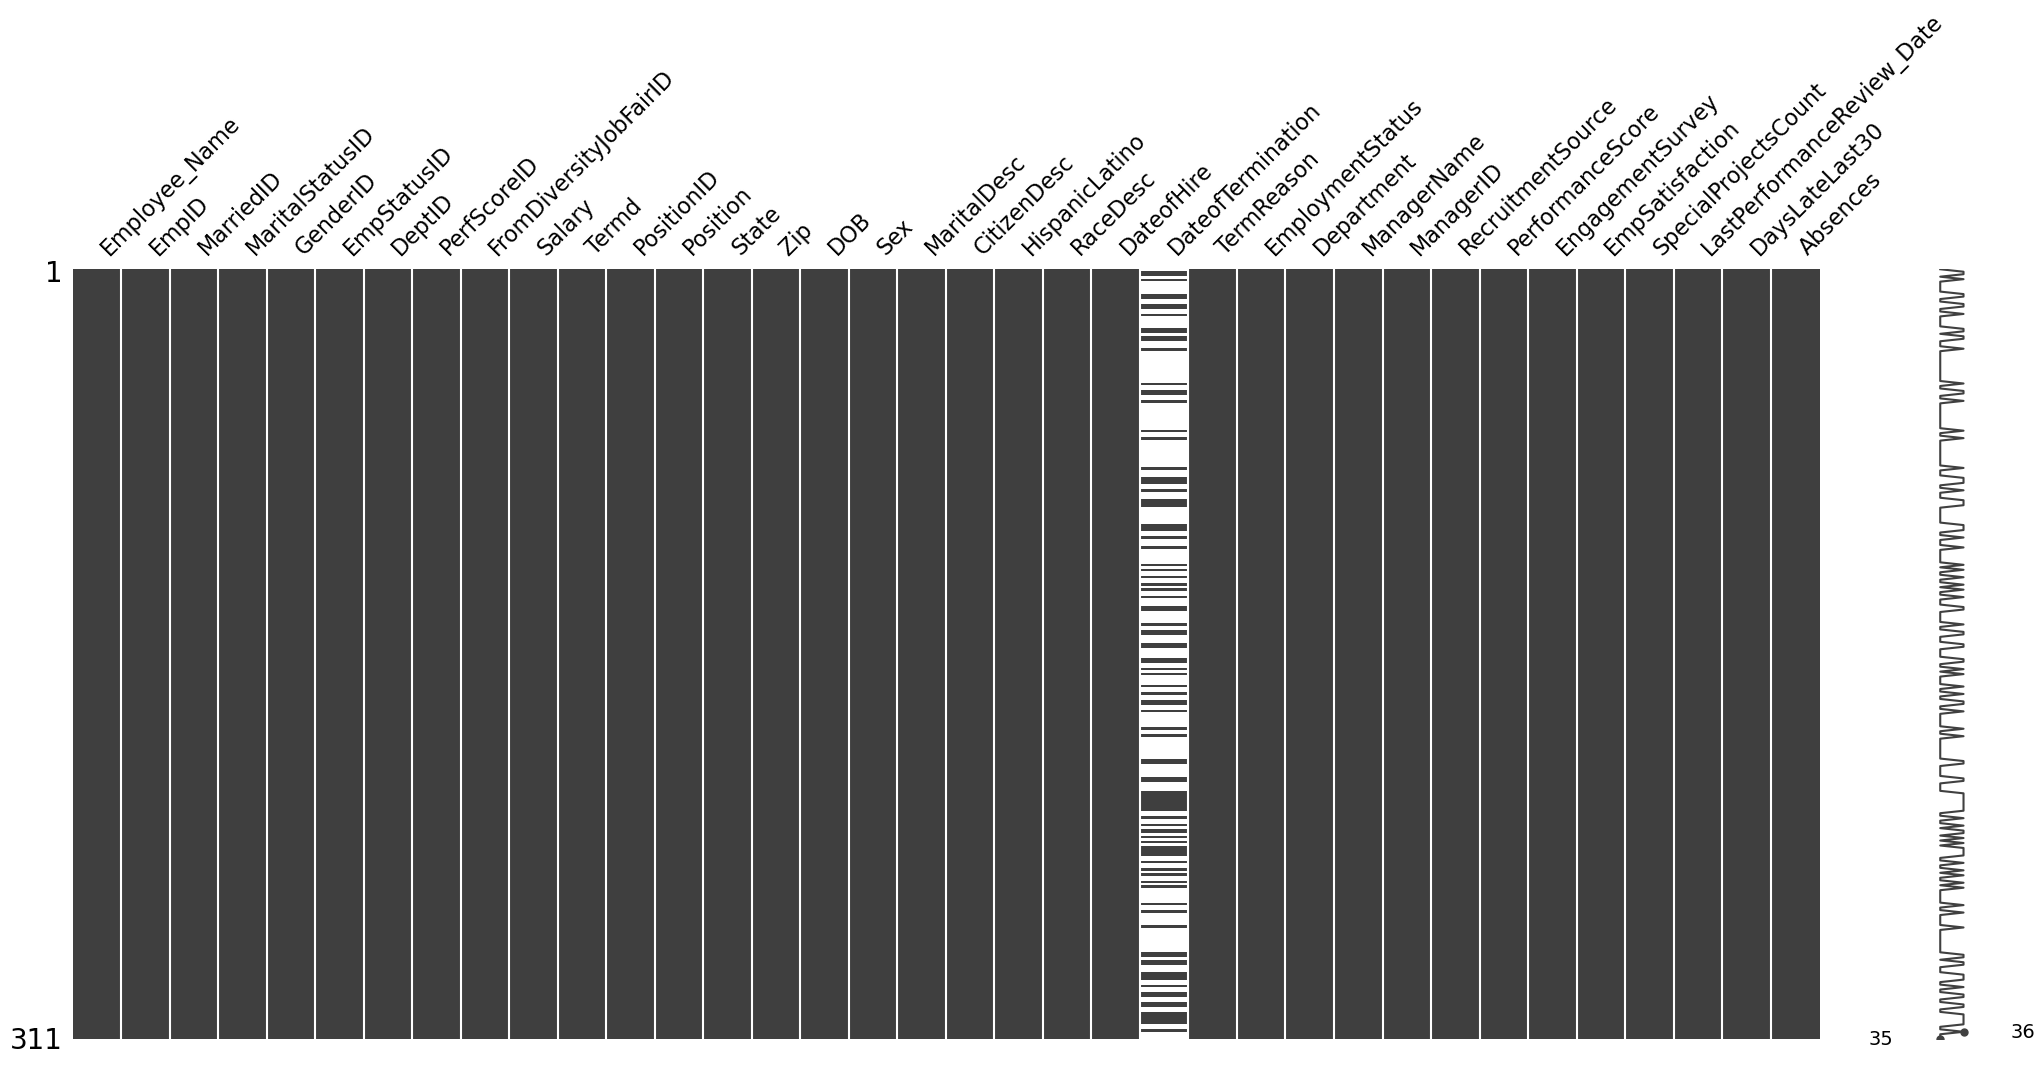

In [164]:
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### We can see that there is one category that is not reliable as there is a lot of missing values. We drop the columns 'DateofTermination'

In [166]:
df.drop(['DateofTermination'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### We see that there is a lot of ID columns that the numbers refer to a categorical variable, so we change it into str

In [167]:
for column_name in df.columns:
    # Check if the column name contains 'ID' excluding the PerfScore ID whic is a proper numerical variable
    if 'ID' in column_name and column_name != 'PerfScoreID':
        # Change the column dtype to string
        df[column_name] = df[column_name].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    object 
 2   MarriedID                   311 non-null    object 
 3   MaritalStatusID             311 non-null    object 
 4   GenderID                    311 non-null    object 
 5   EmpStatusID                 311 non-null    object 
 6   DeptID                      311 non-null    object 
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    object 
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    object 
 12  Position                    311 non-null    object 
 13  State                       311 non

In [168]:
#now we also want to check for duplicates
df = df.drop_duplicates()
df.shape

(311, 35)

In [169]:
#now that we have the data frame in the proper dtype format and we had verified that there are no duplicates, we explore the columns that are objects
for col in df.columns: 
    if df[col].dtype == 'object':
        if df[col].nunique() < 10: 
            print(col)
            print(df[col].value_counts())
            print()
        else:
            print('It was not shown: {}'.format(col))

It was not shown: Employee_Name
It was not shown: EmpID
MarriedID
0    187
1    124
Name: MarriedID, dtype: int64

MaritalStatusID
0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64

GenderID
0    176
1    135
Name: GenderID, dtype: int64

EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64

DeptID
5    208
3     50
6     32
4     10
1     10
2      1
Name: DeptID, dtype: int64

FromDiversityJobFairID
0    282
1     29
Name: FromDiversityJobFairID, dtype: int64

It was not shown: PositionID
It was not shown: Position
It was not shown: State
It was not shown: DOB
Sex
F     176
M     135
Name: Sex, dtype: int64

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

CitizenDesc
US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64

HispanicLatino
No     282
Yes     27
no       1
yes      1


In [170]:
#we also can see that there is a problem with some of the columns that contain the same information but written in different ways, lets fix that
df['HispanicLatino'] = df['HispanicLatino'].str.lower()
df['HispanicLatino'].value_counts()

no     283
yes     28
Name: HispanicLatino, dtype: int64

## 1.What are our best recruiting sources if we want to ensure a diverse organization?

In [171]:
#We group the data by each 'RecruitmentSource' and the 'RaceDesc' column and count how many per each cathegory
df.groupby('RecruitmentSource')[['HispanicLatino','RaceDesc']].value_counts()

RecruitmentSource        HispanicLatino  RaceDesc                        
CareerBuilder            no              White                               15
                                         Black or African American            5
                                         Asian                                2
                         yes             White                                1
Diversity Job Fair       no              Black or African American           22
                         yes             Black or African American            7
Employee Referral        no              White                               22
                                         Black or African American            5
                         yes             White                                3
                         no              Asian                                1
Google Search            no              White                               31
                                         Asian

Text(0.5, 1.0, 'RecruitmentSource by Race')

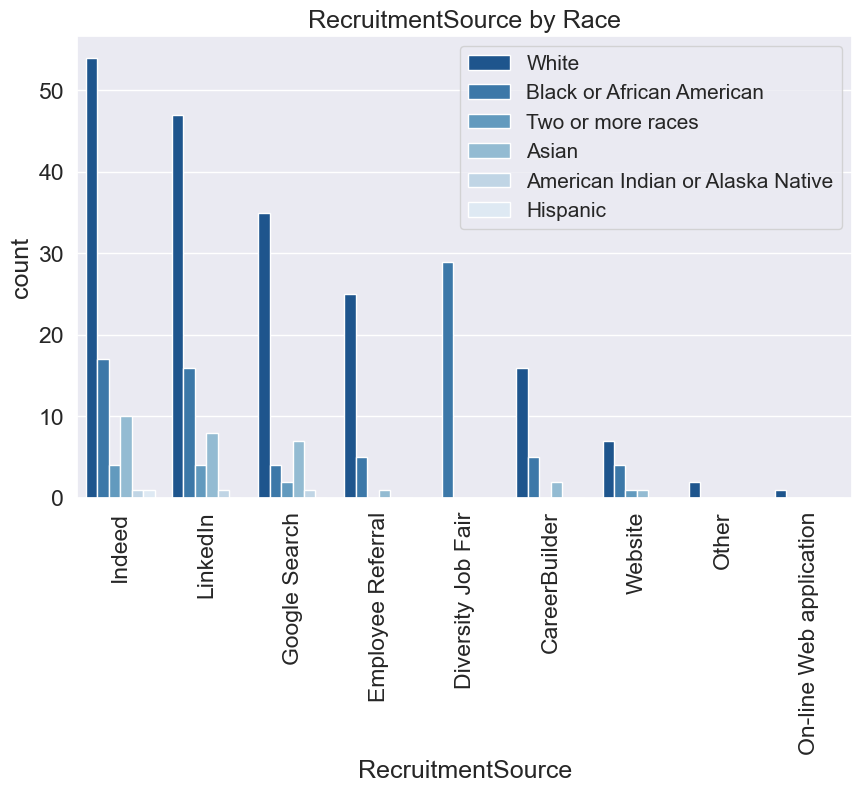

In [244]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RecruitmentSource', data=df, hue='RaceDesc',order=df['RecruitmentSource'].value_counts().index ,palette='Blues_r')
plt.legend(prop={'size': 15})
plt.xticks(rotation=90)
plt.title('RecruitmentSource by Race')

In [173]:
#we see that in the cathegory of "whites" there are some HispanicLatinos, so we have to include them aswell in the diversity dataframe we want to analyze
df.groupby('HispanicLatino')[['RaceDesc']].value_counts().sort_values(ascending=False)

HispanicLatino  RaceDesc                        
no              White                               169
                Black or African American            72
                Asian                                29
yes             White                                18
no              Two or more races                    10
yes             Black or African American             8
no              American Indian or Alaska Native      3
yes             Hispanic                              1
                Two or more races                     1
dtype: int64

### We can see that there is 18 White HispanicLatino people that we have to include in the diversity group

In [174]:
#we see that white people will not be included in the "Diversity", so we have to exclude them to from the analysis
df_diversity = df[~((df['HispanicLatino'] == 'no')&(df['RaceDesc'] == 'White'))]
#The ~ symbol is used to negate the entire condition, effectively selecting rows where the condition is False.

In [175]:
df_diversity.shape

(142, 35)

In [176]:
df_diversity.groupby('HispanicLatino')[['RaceDesc']].value_counts().sort_values(ascending=False)

HispanicLatino  RaceDesc                        
no              Black or African American           72
                Asian                               29
yes             White                               18
no              Two or more races                   10
yes             Black or African American            8
no              American Indian or Alaska Native     3
yes             Hispanic                             1
                Two or more races                    1
dtype: int64

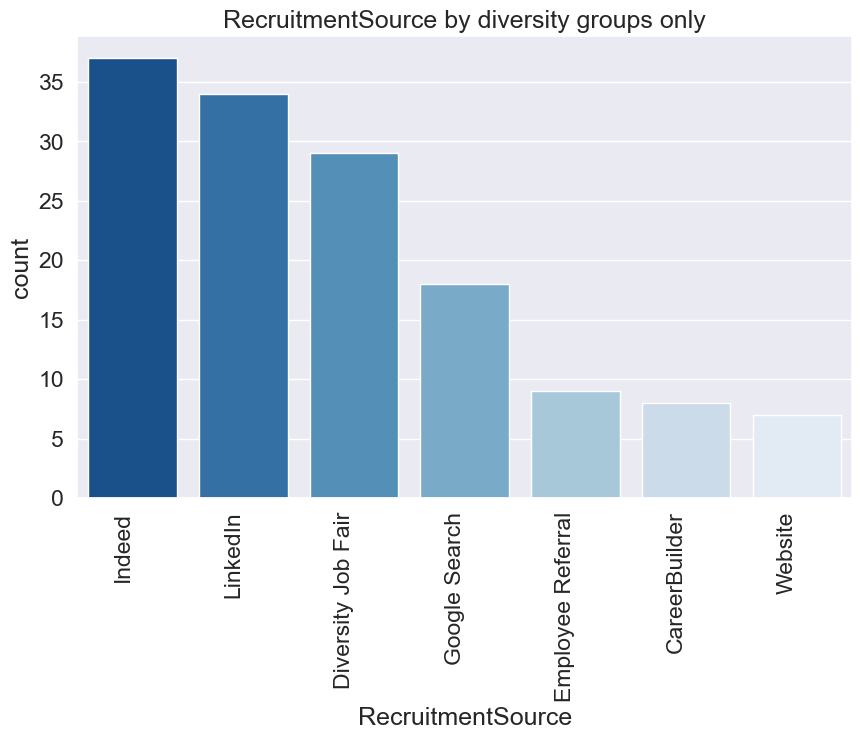

In [238]:
#we also know that we could group the rest of the values in the 'RaceDesc' as from the 'Diversity' group (no need to create distinctions)
plt.figure(figsize=(10, 6))
sns.countplot(x='RecruitmentSource', data=df_diversity, order=df_diversity['RecruitmentSource'].value_counts().index, palette='Blues_r')

plt.xticks(rotation=90, ha='right')
plt.title('RecruitmentSource by diversity groups only')
plt.show()

### we can also calculate the ratio of diversity per each RecruitmentSource from the total of employees

In [178]:
#we will create a function that divides the sum of all the 'RecruitmmentSource' sum per each category from the df_diversity by the same but from the df dataframe
def ratio(x, y):
    result = (x/y)*100
    return round(result,2)
DiversityRatio = ratio(df_diversity['RecruitmentSource'].value_counts(), df['RecruitmentSource'].value_counts()).fillna(0)
DiversityRatio

CareerBuilder               34.78
Diversity Job Fair         100.00
Employee Referral           29.03
Google Search               36.73
Indeed                      42.53
LinkedIn                    44.74
On-line Web application      0.00
Other                        0.00
Website                     53.85
Name: RecruitmentSource, dtype: float64

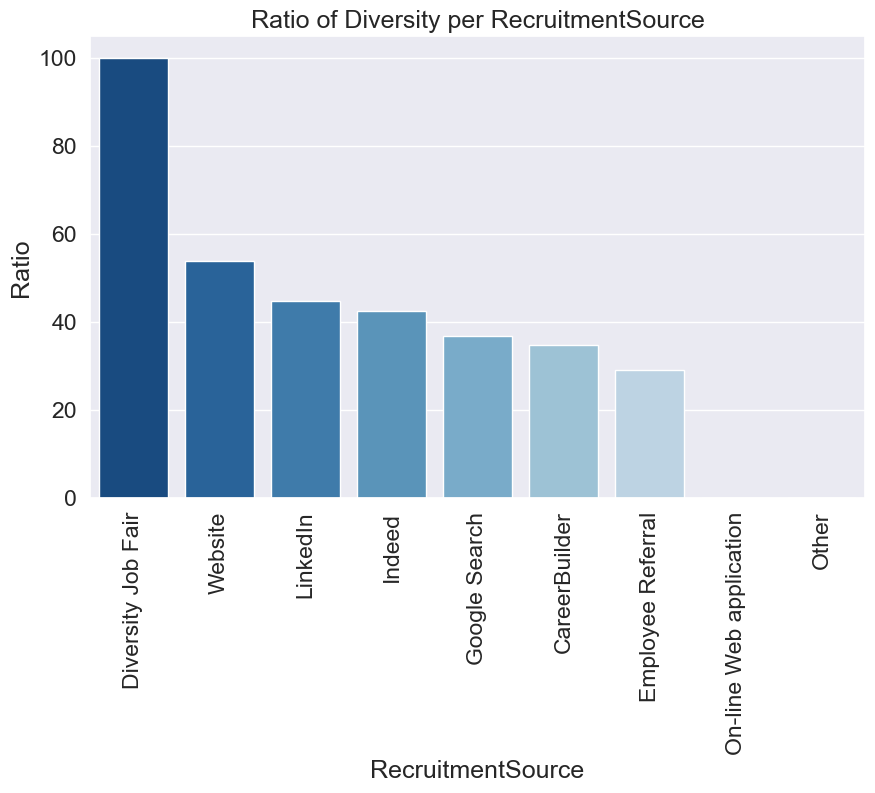

In [237]:
DiversityRatio_sorted = DiversityRatio.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=DiversityRatio_sorted.index, y=DiversityRatio_sorted.values, palette='Blues_r')

plt.title('Ratio of Diversity per RecruitmentSource')
plt.xlabel('RecruitmentSource')
plt.ylabel('Ratio')
plt.xticks(rotation=90)

plt.show()

## 2 - Is there any relationship between who a person works for and their performance score?

In [246]:
PerfbyManager = df.groupby('ManagerName')['PerfScoreID'].mean().round(2)
PerfbyManager

ManagerName
Alex Sweetwater       3.11
Amy Dunn              2.90
Board of Directors    3.00
Brandon R. LeBlanc    3.00
Brannon Miller        2.82
Brian Champaigne      3.00
David Stanley         3.00
Debra Houlihan        2.67
Elijiah Gray          3.00
Eric Dougall          3.25
Janet King            3.11
Jennifer Zamora       3.14
John Smith            2.71
Kelley Spirea         3.09
Ketsia Liebig         3.05
Kissy Sullivan        2.95
Lynn Daneault         3.00
Michael Albert        2.86
Peter Monroe          2.86
Simon Roup            3.12
Webster Butler        3.00
Name: PerfScoreID, dtype: float64

In [223]:
EmpbyManager = df.groupby('ManagerName')['EmpID'].count().sort_values(ascending=False)
EmpbyManager

ManagerName
Michael Albert        22
Kissy Sullivan        22
Brannon Miller        22
Kelley Spirea         22
Elijiah Gray          22
Webster Butler        21
Amy Dunn              21
Ketsia Liebig         21
David Stanley         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: EmpID, dtype: int64

In [289]:
df_managerperfv = pd.merge(df['ManagerName'], PerfbyManager, on='ManagerName')
df_managerperfv = df_managerperfv.drop_duplicates().sort_values('PerfScoreID', ascending=False)
df_managerperfv['PerfScoreIDNorm'] = df_managerperfv['PerfScoreID'] / (df_managerperfv['PerfScoreID'].sum() / df_managerperfv['PerfScoreID'].count())

df_managerperfv

,ManagerName,PerfScoreID,PerfScoreIDNorm
294,Eric Dougall,3.25,1.089559
274,Jennifer Zamora,3.14,1.052682
22,Simon Roup,3.12,1.045977
125,Alex Sweetwater,3.11,1.042625
241,Janet King,3.11,1.042625
212,Kelley Spirea,3.09,1.035920
134,Ketsia Liebig,3.05,1.022510
191,David Stanley,3.00,1.005747
301,Brian Champaigne,3.00,1.005747
281,Lynn Daneault,3.00,1.005747


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Employee Performance by Manager')

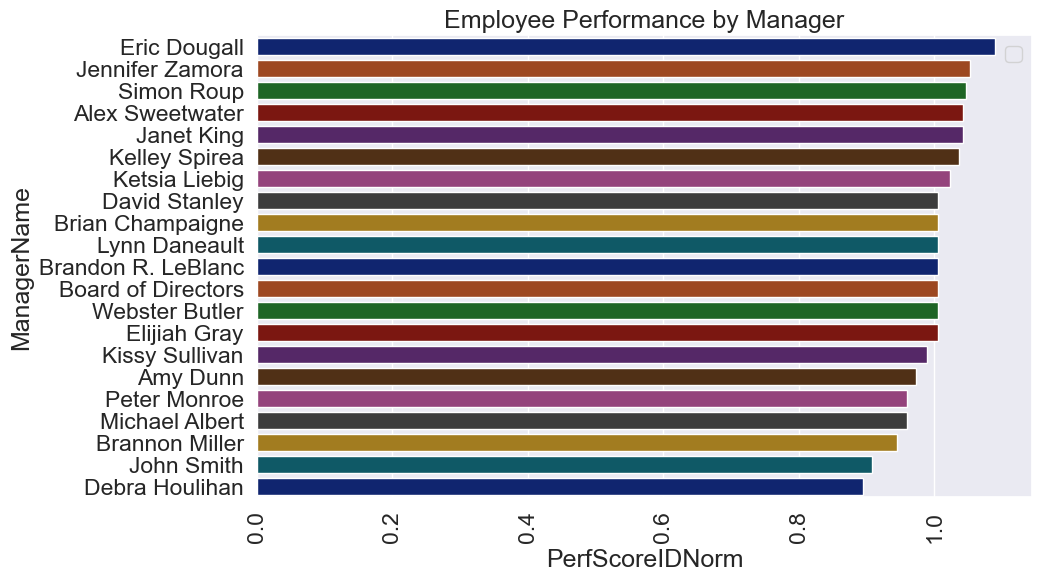

In [292]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PerfScoreIDNorm',y='ManagerName',data=df_managerperfv,palette='dark')
plt.legend(prop={'size': 15})
plt.xticks(rotation=90)
#plt.xlim(2,3.5)
plt.title('Employee Performance by Manager')

## 3 - Which are the main reasons our employees are leaving us?